In [ ]:
import pandas as pd 
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#making  sure yhat the path exists 
import os
path = '/content/drive/MyDrive/train.jpg'
if os.path.exists(path):
     #read the image
     image = cv2.imread(path)
else:
    print("Path does not exist:", path)

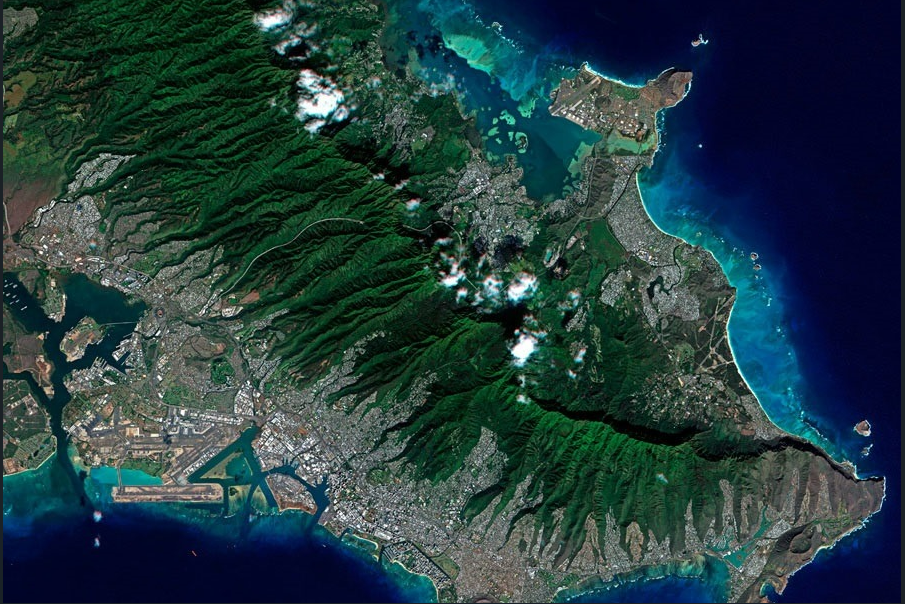

In [ ]:
#convert to RGB 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
''' to understand the reshape function I recommend :
https://stackoverflow.com/questions/18691084/what-does-1-mean-in-numpy-reshape
'''

' to understand the reshape function I recommend :\nhttps://stackoverflow.com/questions/18691084/what-does-1-mean-in-numpy-reshape\n'

In [ ]:
# convert to float
pixel_values = np.float32(pixel_values)

In [ ]:
print(pixel_values.shape)


(544188, 3)


As we specified, columns equal 3.

In [ ]:
# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
''' Why ?
a normal K-meams clustering will stop when  none of the cluster assignments change,
this will take a lot of time in this case,
so we will define a case were the iteration stops.
here : if the iterations reaches 100 or the Eps reaches 0.2 then stop the iteration.
'''

' Why ?\na normal K-meams clustering will stop when  none of the cluster assignments change,\nthis will take a lot of time in this case,\nso we will define a case were the iteration stops.\nhere : if the iterations reaches 100 or the Eps reaches 0.2 then stop the iteration.\n'

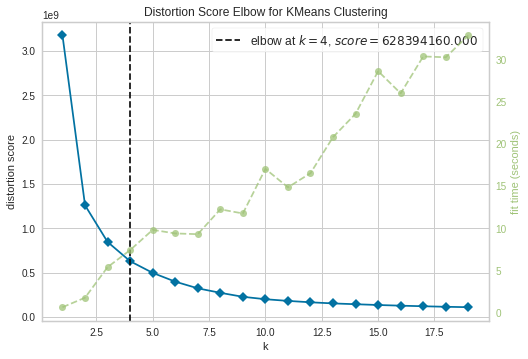

In [ ]:
# number of clusters (K) will be defined by the elbow method 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20))

visualizer.fit(pixel_values)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
k = 4 # according to elbow method
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [ ]:
# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()

In [ ]:
# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]

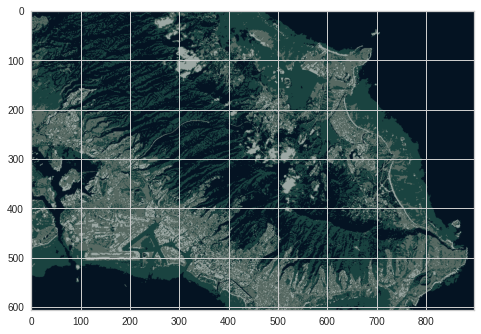

In [ ]:
# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)
# show the image
plt.imshow(segmented_image)
plt.show()